In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [2]:
da1_tr = pd.read_csv('/Users/divyeshbhatt/Downloads/Datas/Kaggle_Contests/Otto/train.csv')

In [4]:
import time

In [3]:
da1_tr.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
X = da1_tr.drop('target', axis = 1)
y = da1_tr['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import LabelEncoder

lab_enc_y = LabelEncoder().fit_transform(y)

In [6]:
# ## checking on XGB
# res = []
# num_threads = [1, 2, 3, 4]

# for n in num_threads:
#     start = time.time()
#     mod1 = xgb.XGBClassifier(nthread = n)
#     mod1.fit(X, lab_enc_y)
#     elapsed = time.time() - start
#     print(n, elapsed)
#     res.append(elapsed)

In [7]:
# plt.plot(num_threads, res)
# plt.ylabel('Speed')
# plt.xlabel('No Of Threads')
# plt.title('No Of Threads V Speed')
# plt.show()

In [8]:
from xgboost import XGBClassifier
mod1 = xgb.XGBClassifier()

In [9]:
n_est1 = range(50, 400, 50)

In [10]:
par_grid1 = dict(n_estimators = n_est1)

In [11]:
kf1 = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
gr1 = GridSearchCV(mod1, par_grid1, scoring = 'neg_log_loss', n_jobs = -1, cv = kf1)
gr1_res = gr1.fit(X, lab_enc_y)

/Users/divyeshbhatt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/divyeshbhatt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/divyeshbhatt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/divyeshbhatt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/divyeshbhatt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to

In [14]:
print(gr1_res.best_score_, gr1_res.best_params_)

-0.007714181313844601 {'n_estimators': 50}


In [15]:
means = gr1_res.cv_results_['mean_test_score']
std1 = gr1_res.cv_results_['std_test_score']
param1 = gr1_res.cv_results_['params']
for mean, stdev, param in zip(means, std1, param1):
    print(mean, stdev, param)

-0.007714181313844601 0.0021441532839038715 {'n_estimators': 50}
-0.008444827343958404 0.0024918085161492096 {'n_estimators': 100}
-0.00875360291906908 0.002612745280045033 {'n_estimators': 150}
-0.008991280144394403 0.002746518986074243 {'n_estimators': 200}
-0.009141192220752986 0.0028230664825812444 {'n_estimators': 250}
-0.009263901268710737 0.0028928601432698896 {'n_estimators': 300}
-0.009377495555088315 0.002936339110995435 {'n_estimators': 350}


In [16]:
## plot

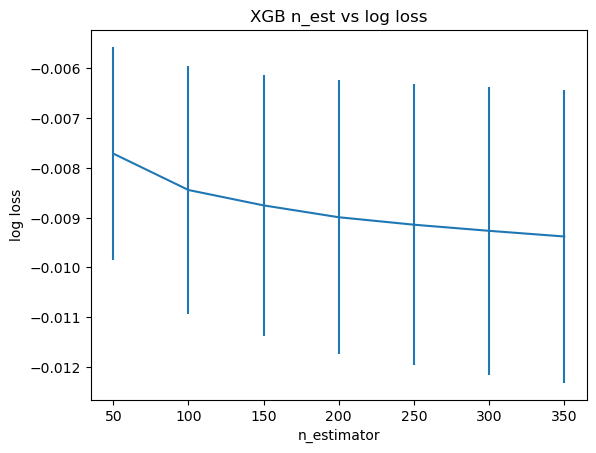

In [17]:
plt.errorbar(n_est1, means, yerr = std1)
plt.title('XGB n_est vs log loss')
plt.xlabel('n_estimator')
plt.ylabel('log loss')
plt.show()